In [13]:
# import the packages we need for the project
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,9)

pd.options.mode.chained_assignment = None

Read the data

In [14]:
data = pd.read_csv('/Users/salman/Downloads/Analysis/PortfolioProjects/movies/movies.csv')


In [15]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [16]:
data.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

Handling missing values

In [17]:
#missing data
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [18]:
data.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [20]:
data['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [21]:
data['rating'].isnull().sum()

77

In [22]:
#filling missing values of rating
data['rating'] = data['rating'].fillna('R')

Dropping missing values in rows

In [23]:
data = data.dropna(how='any', subset=['released'])

In [24]:
data = data.dropna(how='any', subset=['score','votes','writer','star','country','runtime','company','budget','gross'])

In [25]:
data.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [26]:
df = data.copy()

In [27]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [28]:
#change data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [29]:
# drop duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


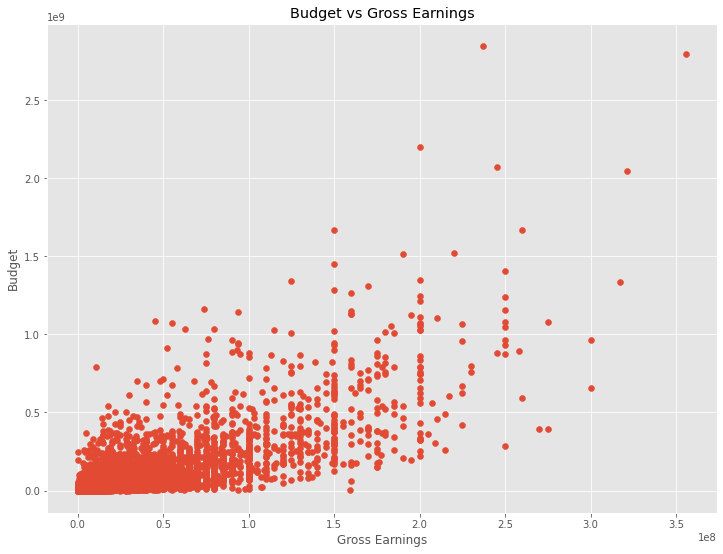

In [30]:
#scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

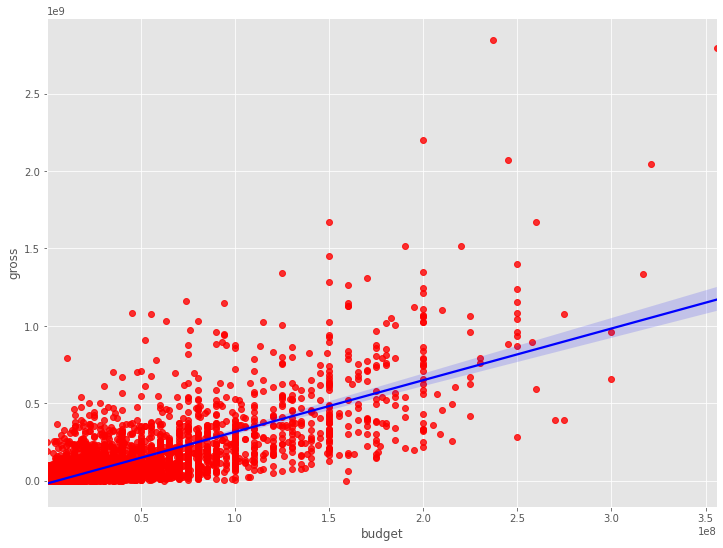

In [33]:
sns.regplot(x='budget', y='gross', data = df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [34]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055223,0.205862,0.327888,0.274434,0.074666
score,0.055223,1.000000,0.473687,0.071568,0.221950,0.414463
votes,0.205862,0.473687,1.000000,0.439890,0.614824,0.352322
budget,0.327888,0.071568,0.439890,1.000000,0.740362,0.318423
gross,0.274434,0.221950,0.614824,0.740362,1.000000,0.275470
runtime,0.074666,0.414463,0.352322,0.318423,0.275470,1.000000


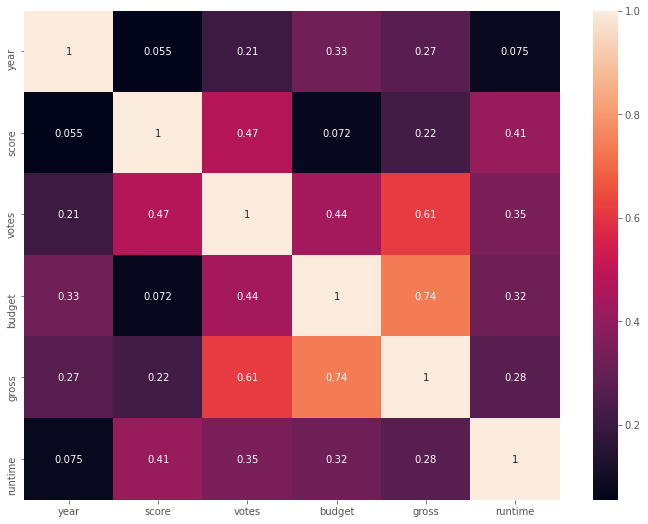

In [35]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [36]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [37]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4702,6,6,1980,1308,8.4,927000,1797,2838,699,46,19000000,46998772,1431,146
1,3939,6,1,1980,1131,5.8,65000,1580,1159,214,47,4500000,58853106,454,104
2,3651,4,0,1980,1363,8.7,1200000,759,1821,1160,47,18000000,538375067,948,124
3,205,4,4,1980,1131,7.7,221000,891,1415,1477,47,3500000,83453539,1113,88
4,734,6,4,1980,1174,7.3,108000,721,351,271,47,6000000,39846344,1088,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000,17,2395,1818,47,90000000,426505244,454,124
7649,3566,4,0,2020,715,6.5,102000,854,2314,147,47,85000000,319715683,1113,99
7650,1155,4,1,2020,907,5.6,53000,1811,2833,1473,47,175000000,245487753,1402,101
7651,3988,4,1,2020,760,6.8,42000,296,2095,640,6,135000000,111105497,12,100


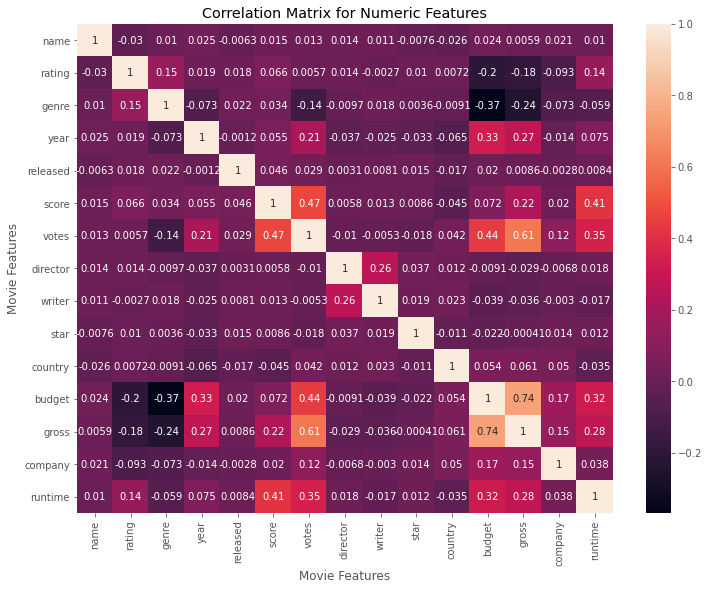

In [41]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [43]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs
pd.set_option('display.max_rows', 270)

In [44]:
corr_pairs

name      name        1.000000
          rating     -0.029696
          genre       0.010247
          year        0.024901
          released   -0.006258
          score       0.014785
          votes       0.012817
          director    0.013827
          writer      0.011492
          star       -0.007576
          country    -0.025544
          budget      0.023586
          gross       0.005876
          company     0.021225
          runtime     0.010341
rating    name       -0.029696
          rating      1.000000
          genre       0.148873
          year        0.018791
          released    0.017826
          score       0.066444
          votes       0.005695
          director    0.014355
          writer     -0.002693
          star        0.010117
          country     0.007191
          budget     -0.204698
          gross      -0.182403
          company    -0.092851
          runtime     0.141017
genre     name        0.010247
          rating      0.148873
        

In [46]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre     budget     -0.368763
budget    genre      -0.368763
genre     gross      -0.244339
gross     genre      -0.244339
rating    budget     -0.204698
budget    rating     -0.204698
rating    gross      -0.182403
gross     rating     -0.182403
votes     genre      -0.136313
genre     votes      -0.136313
company   rating     -0.092851
rating    company    -0.092851
genre     year       -0.073368
year      genre      -0.073368
company   genre      -0.072928
genre     company    -0.072928
country   year       -0.065406
year      country    -0.065406
genre     runtime    -0.059415
runtime   genre      -0.059415
country   score      -0.045014
score     country    -0.045014
writer    budget     -0.039477
budget    writer     -0.039477
director  year       -0.036908
year      director   -0.036908
gross     writer     -0.035969
writer    gross      -0.035969
runtime   country    -0.034941
country   runtime    -0.034941
star      year       -0.032861
year      star       -0.032861
rating  

In [50]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.614824
votes     gross       0.614824
gross     budget      0.740362
budget    gross       0.740362
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

Votes and Budget have the highest correlation to gross earnings